In [99]:
import sys
from pickle_wrapper import unpickle
import pandas as pd
import yaml
import tqdm
from numpy import log

sys.path.append('../src')

In [22]:
with open("../params_nc.yaml", 'r') as fd:
    params = yaml.safe_load(fd)

In [23]:
num_obs=params["num_observations"]

In [24]:
num_obs

40

### Get violation rate in obs gen for diff trials,w_nc

In [25]:
base_path="../data_nc/exp_nc3/"
exp_paths=!ls $base_path

In [60]:
def get_num_viols(nc_obs):
    n_viols=0
    for obs in nc_obs:
        for action_pairs in zip(obs, obs[1:]):
            if action_pairs[0] in [(('pickup', 8), ('putdown', 8, '1')),(('pickup', 40), ('putdown', 40, '1'))]:
                if action_pairs[1][1][2] =='1': #not in obl zone
                    n_viols+=1
                elif action_pairs[1][1][2] =='3':
                    if action_pairs[1][1][1] not in [35,13]: #permission not applicable
                        n_viols+=1
    return (n_viols)

In [50]:
40*108/243

17.77777777777778

In [86]:
z1=pd.DataFrame()
for exp_path in exp_paths:
    temp=pd.DataFrame()
    #Add params
    obs_path=base_path+exp_path+"/obs.pickle"
    obs = unpickle(obs_path)
    temp["w_nc"] = [float(exp_path.split("w_nc=")[1].split(",")[0])]
    trial=1 if "trial" not in exp_path else exp_path.split(",trial=")[-1]
    temp["trial"]=[int(trial)]
    #Add violations
    n_viols=get_num_viols(obs)
    temp["violation_rate"]=[n_viols/num_obs]
    #Add lik,post
    prior_true=!grep "For True Norm" {base_path+exp_path+"/run.log"}
    lik_true=!grep "lik_no_norm" {base_path+exp_path+"/run.log"}
    post_true=float(prior_true[0].split("log_prior=")[-1]) + float(lik_true[0].split("lik_true_norm=")[1])
    temp["true_norm_posterior"]=[post_true]
    z1=z1.append(temp)

In [102]:
z1["f_w_nc"]=z1["violation_rate"]*log(z1["w_nc"])

/Users/ashish1610dhiman/data_projects/otago_norm_learning/mcmc/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='w_nc'>

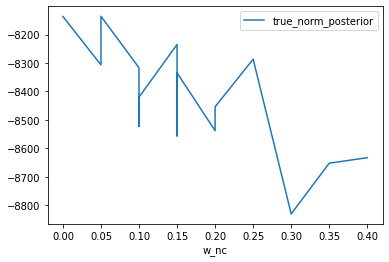

In [94]:
z1.plot(x="w_nc",y="true_norm_posterior")

<AxesSubplot:xlabel='w_nc'>

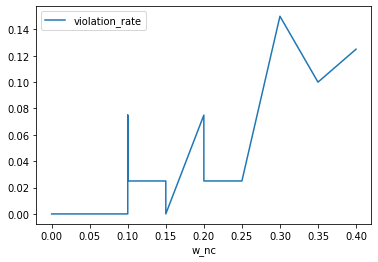

In [95]:
z1.plot(x="w_nc",y="violation_rate")

<AxesSubplot:xlabel='violation_rate', ylabel='true_norm_posterior'>

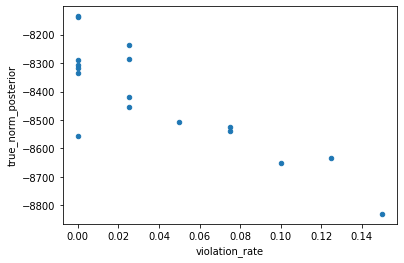

In [98]:
z1.plot(x="violation_rate",y="true_norm_posterior",kind="scatter")

In [110]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [124]:
z2=z1.dropna()

In [126]:
X = z2["f_w_nc"].values.reshape(-1, 1)   # values converts it into a numpy array
Y = z2["true_norm_posterior"]    # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [133]:
linear_regressor.coef_,linear_regressor.intercept_

(array([2233.09769291]), -8305.512621749438)

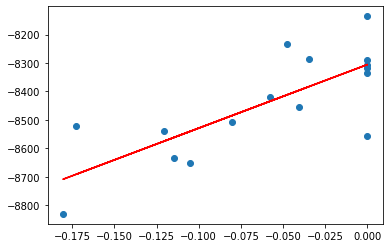

In [127]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [104]:
z1

,w_nc,trial,violation_rate,true_norm_posterior,f_w_nc
0,0.00,1,0.000,-8136.321544,NaN
0,0.05,1,0.000,-8306.438554,-0.000000
0,0.05,2,0.000,-8290.668232,-0.000000
0,0.05,3,0.000,-8135.419097,-0.000000
0,0.10,1,0.000,-8316.614782,-0.000000
0,0.10,2,0.075,-8522.915619,-0.172694
0,0.10,3,0.025,-8419.803750,-0.057565
0,0.15,1,0.025,-8234.718944,-0.047428
0,0.15,2,0.000,-8556.134854,-0.000000
0,0.15,3,0.000,-8334.691848,-0.000000
